In [13]:
import torch

In [14]:
# 所有的模型都要继承自 Module
class LinearModel(torch.nn.Module):
    # __init__ 和 forward函数是必须的模版
    # 构造函数，初始化对象
    def __init__(self):
        # 调用父类（即torch.nn.Module）初始化方法
        super(LinearModel, self).__init__() # 确保创建 LinearModel 实例时，也会调用父类 torch.nn.Module的构造函数 just do it
        # torch.nn.Linear 是 pytorch 里面的一个类，用于构造对象，包含权重和偏置，也是继承自 Module。
        self.linear = torch.nn.Linear(1,1)
    # forward，前馈要执行的计算
    def forward(self, x):
        y_pred = self.linear(x) #对象加（），表示面向对象
        return y_pred
    # Module 里面会自动有 backward
    
model = LinearModel()
# 构造损失函数
criterion = torch.nn.MSELoss(size_average=False) # 继承 nn.Module

# 构造优化器
optimizer = torch.optim.SGD(model.parameters(), lr=1)

/home/fl/miniconda3/envs/DTox/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [15]:

model = LinearModel()
optimizers = [
    torch.optim.SGD(model.parameters(), lr=0.01),
    torch.optim.Adagrad(model.parameters(), lr=0.01),
    torch.optim.Adam(model.parameters(), lr=0.01),
    torch.optim.Adamax(model.parameters(), lr=0.01),
    torch.optim.ASGD(model.parameters(), lr=0.01),
    torch.optim.RMSprop(model.parameters(), lr=0.01),
    torch.optim.Rprop(model.parameters(), lr=0.01)
]

x_data = torch.tensor([[1.0], [2.0], [3.0], [4.0], [5.0], [6.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0], [8.0], [10.0], [12.0]])

In [16]:
epoch_list = [i for i in range(1000)]
SGD_list = []
Adagrad_list = []
Adam_list = []
Adamax_list = []
ASGD_list = []
LBFGS_list = []
RMSprop_list = []
Rprop_list = []

for optimizer in optimizers:
    print("Optimizer:", optimizer.__class__.__name__)
    for epoch in range(1000):
        # 训练
        y_pred = model(x_data)
        # 计算损失
        loss = criterion(y_pred, y_data)
        # loss是对象，print 的时候内置__str__(),所以不会产生计算图
        print("Epoch:", epoch, "Loss:", loss.item())
        if optimizer.__class__.__name__ == "SGD":
            SGD_list.append(loss.item())
        elif optimizer.__class__.__name__ == "Adagrad":
            Adagrad_list.append(loss.item())
        elif optimizer.__class__.__name__ == "Adam":
            Adam_list.append(loss.item())
        elif optimizer.__class__.__name__ == "Adamax":
            Adamax_list.append(loss.item())
        elif optimizer.__class__.__name__ == "ASGD":
            ASGD_list.append(loss.item())
        elif optimizer.__class__.__name__ == "RMSprop":
            RMSprop_list.append(loss.item())
        elif optimizer.__class__.__name__ == "Rprop":
            Rprop_list.append(loss.item())
            
        # backward, 梯度归零
        optimizer.zero_grad()
        loss.backward()
        # 更新
        optimizer.step()
        
    print('w=', model.linear.weight.item())
    print('b=', model.linear.bias.item())

    # Test Model
    x_test = torch.tensor([4.0])
    y_test = model(x_test)
    print('y_pred=', y_test.data)


Optimizer: SGD
Epoch: 0 Loss: 483.7639465332031
Epoch: 1 Loss: 407.8359680175781
Epoch: 2 Loss: 343.8323974609375
Epoch: 3 Loss: 289.8802185058594
Epoch: 4 Loss: 244.40054321289062
Epoch: 5 Loss: 206.0626678466797
Epoch: 6 Loss: 173.744873046875
Epoch: 7 Loss: 146.50146484375
Epoch: 8 Loss: 123.53544616699219
Epoch: 9 Loss: 104.17507934570312
Epoch: 10 Loss: 87.85396575927734
Epoch: 11 Loss: 74.09480285644531
Epoch: 12 Loss: 62.49523162841797
Epoch: 13 Loss: 52.71609115600586
Epoch: 14 Loss: 44.471473693847656
Epoch: 15 Loss: 37.52037048339844
Epoch: 16 Loss: 31.659698486328125
Epoch: 17 Loss: 26.718215942382812
Epoch: 18 Loss: 22.551593780517578
Epoch: 19 Loss: 19.038183212280273
Epoch: 20 Loss: 16.075408935546875
Epoch: 21 Loss: 13.576828002929688
Epoch: 22 Loss: 11.469592094421387
Epoch: 23 Loss: 9.692281723022461
Epoch: 24 Loss: 8.193092346191406
Epoch: 25 Loss: 6.928399562835693
Epoch: 26 Loss: 5.861410140991211
Epoch: 27 Loss: 4.961106300354004
Epoch: 28 Loss: 4.20134162902832
Ep

In [21]:
optimizer_LBFGS = torch.optim.LBFGS(model.parameters(), lr=1)

LBFGS_list = []

for epoch in range(1000):
    def closure():
        optimizer_LBFGS.zero_grad()
        y_pred = model(x_data)
        loss = criterion(y_pred, y_data)
        loss.backward()
        LBFGS_list.append(loss.item())
        print('epoch:', epoch, 'Loss:', loss.item())  # 打印损失值
        return loss
    
    optimizer.step(closure=closure)      
    
    

epoch: 0 Loss: 388.02099609375
epoch: 1 Loss: 388.02099609375
epoch: 2 Loss: 388.02099609375
epoch: 3 Loss: 388.02099609375
epoch: 4 Loss: 388.02099609375
epoch: 5 Loss: 388.02099609375
epoch: 6 Loss: 388.02099609375
epoch: 7 Loss: 388.02099609375
epoch: 8 Loss: 388.02099609375
epoch: 9 Loss: 388.02099609375
epoch: 10 Loss: 388.02099609375
epoch: 11 Loss: 388.02099609375
epoch: 12 Loss: 388.02099609375
epoch: 13 Loss: 388.02099609375
epoch: 14 Loss: 388.02099609375
epoch: 15 Loss: 388.02099609375
epoch: 16 Loss: 388.02099609375
epoch: 17 Loss: 388.02099609375
epoch: 18 Loss: 388.02099609375
epoch: 19 Loss: 388.02099609375
epoch: 20 Loss: 388.02099609375
epoch: 21 Loss: 388.02099609375
epoch: 22 Loss: 388.02099609375
epoch: 23 Loss: 388.02099609375
epoch: 24 Loss: 388.02099609375
epoch: 25 Loss: 388.02099609375
epoch: 26 Loss: 388.02099609375
epoch: 27 Loss: 388.02099609375
epoch: 28 Loss: 388.02099609375
epoch: 29 Loss: 388.02099609375
epoch: 30 Loss: 388.02099609375
epoch: 31 Loss: 38

/tmp/ipykernel_3447676/3865664253.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  ms.use("seaborn-dark")


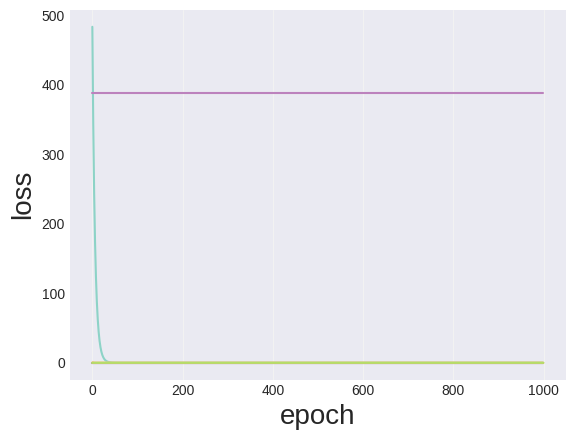

In [28]:
import matplotlib.pyplot as plt
import matplotlib.style as ms
import numpy as np
epoch_list = [i for i in range(1000)]
ms.use("seaborn-dark")
pic=plt.plot(
    epoch_list, SGD_list, 
    epoch_list, Adagrad_list,
    epoch_list, Adam_list, 
    epoch_list, Adamax_list, 
    epoch_list, ASGD_list, 
    epoch_list, RMSprop_list, 
    epoch_list, Rprop_list, 
    epoch_list, LBFGS_list, 
    )

plt.grid(axis='x', color='0.95')
plt.xlabel("epoch",size=20)
plt.ylabel("loss",size=20)
plt.show()